In [ ]:
%%shell
jupyter nbconvert --to html /content/Noah_Schapera_PHYS_BIOL_212_Module_4_Part_I.ipynb

[NbConvertApp] Converting notebook /content/Noah_Schapera_PHYS_BIOL_212_Module_4_Part_I.ipynb to html
[NbConvertApp] Writing 367593 bytes to /content/Noah_Schapera_PHYS_BIOL_212_Module_4_Part_I.html


This is the first half of the module 4 assignment. The full module 4 assignment will be due on Monday, March 14 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

0. List the names of your group members, as well as any other class members you conferred with for this assignment.

In [ ]:
Noah Schapera, Jacob Marcus

Noah Schapera, Jacob Marcus

1. We discussed fitting models to data using the least squares regression. The Python function ```lstsqr``` within the linalg submodule of numpy that will perform model fits to data using least squares regression.  In this question, you will explore the details of fitting polynomial models to data.

(a) We discussed fitting a linear function to a data set in class, and wrote out the matrix equation that corresponds to a linear function with two fit parameters.  Assume now that you have a data set with $4$ points: $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, $(x_4,y_4)$, and that the best-fit model is of the form: $y = ax^2+bx+c$. Write the corresponding matrix equation, in the form of $\vec{y} = A \vec{m}$.

\begin{gather}
 \begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
 =
  \begin{bmatrix}
x_1^2 & x_1 & 1\\
x_2^2 & x_2 & 1\\
x_3^2 & x_3 & 1\\
\end{bmatrix}
  \begin{bmatrix}
   a \\
   b \\
   c \\ 
   \end{bmatrix}
\end{gather}

(b) Using the answer to the (a) as a guide, write down a more generalized form of this matrix equation that assumes you have $n$ data points and want to fit a $k^{th}$ order polynomial to your data.

\begin{gather}
 \begin{bmatrix}
y_1\\
y_2\\
y_3 \\
... \\
y_n
\end{bmatrix}
 =
  \begin{bmatrix}
x_1^k & x_1^{k-1} & ... & 1\\
x_2^k & x_2^{k-1} & ... & 1\\
x_3^k & x_3^{k-1} & ... & 1\\
... & ... & ... & 1 \\
x_n^k & x_n^{k-1} & ... & 1
\end{bmatrix}
  \begin{bmatrix}
   a \\
   b \\
   c \\
   ... \\
   k+1 
   \end{bmatrix}
\end{gather}

(c) Write a function that uses ```lstsq``` to fit a polynomial of any order $k$ to an arbitrary data set. Your function should take in $x$ and $y$ values for a data set and a specified polynomial order, $k$. Your function should return an array of all fit parameter values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

def findParams(x,y,k):
  A=np.zeros((len(x),k+1))
  ks=np.zeros(k+1)
  for ki in range(len(ks)):
    ks[ki]=k-ki
  for i in range(np.shape(A)[0]):
    for ii in range(np.shape(A)[1]):
      A[i][ii]=x[i]**ks[ii]
  m=np.linalg.lstsq(A,y,rcond=None)
  return m[0]

(d) Test your function. Create some data for x-values in the range $[-10,10]$ using the equation $y = 5x^2+3x+2$. Using the procedure we discussed in class, add some noise to your data, with a noise amplitude of $50$. Fit your data using your function from part (c). Plot your data and the resulting fit. Be sure to include labels for full credit.

In [ ]:
def noiseAdd(y,noiseAmp):
  noise = noiseAmp*(np.random.rand(len(y))-0.5)
  yNoise = y+noise
  return yNoise

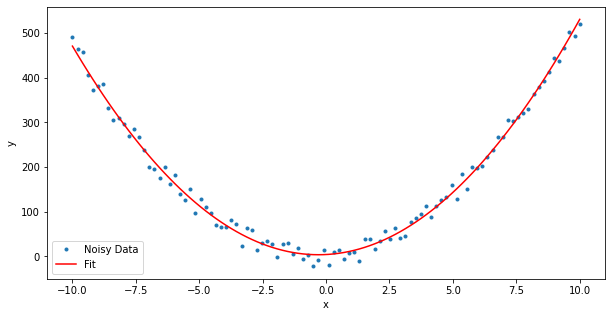

In [ ]:
x=np.linspace(-10,10,100)
y=5*x**2+3*x+2
yNoise=noiseAdd(y,50)
m=findParams(x,yNoise,2)
yFit=m[0]*x**2+m[1]*x+m[2]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
ax.plot(x,yNoise,'.',label="Noisy Data")
ax.plot(x,yFit,color='red', label="Fit")
ax.set(xlabel='x',ylabel='y')
plt.legend()
plt.show()

(e) Write a function that will evaluate your polynomial fit at x-values you input.  Your function should take in the parameter array that is output from your polynomial fit function and an array of x-values. Your function should output an array of y-values associated with the fit. Recreate the plot from the previous question using your new function to confirm that it's working properly.

In [ ]:
def fitY(x,m):
  y=np.zeros(len(x))
  yindiv=0
  for i in range(len(x)):
    for ii in range(len(m)):
      yindiv = yindiv+m[ii]*x[i]**(len(m)-(1+ii))
    y[i]=yindiv
    yindiv=0
  return y


2. Now that you can quickly fit data and plot the results, this question will explore polynomial fits of different degrees.

(a) Let's say we have a linear data set with some noise.  To mimic this, create a noisy data set. Use $10$ x-values in the range $[-5,5]$, and use the equation $y=5x+2$. Add noise with an amplitude of $10$. Plot the data points.

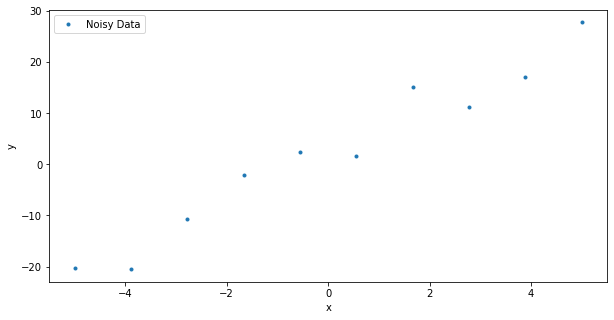

In [ ]:
x=np.linspace(-5,5,10)
y=noiseAdd(5*x+2,10)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
ax.plot(x,y,'.',label="Noisy Data")
ax.set(xlabel='x',ylabel='y')
plt.legend()
plt.show()

(b) Use your polynomial fitting function to fit polynomials of orders $1,2,5,10$ to your data set. Use your polynomial evaluation function to evaluate each fit over a larger and more finely spaced array of x-values, say $1000$ points in the range $[-8,8]$. Plot your original data points along with these fit evaluations, and include a legend. Restrict the y-range of your plot so that you can clearly see how the fits compare to the data points and to each other.

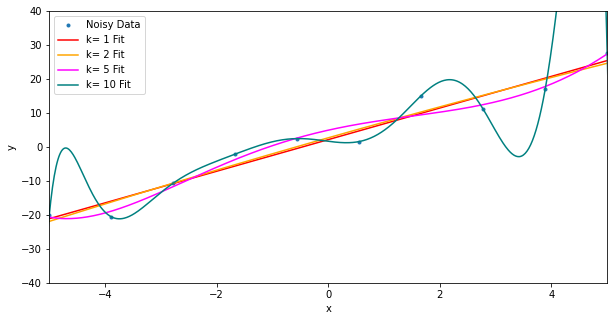

In [ ]:
xfit=np.linspace(-8,8,1000)

m1=findParams(x,y,1)
m2=findParams(x,y,2)
m5=findParams(x,y,5)
m10=findParams(x,y,10)

y1=fitY(xfit,m1)
y2=fitY(xfit,m2)
y5=fitY(xfit,m5)
y10=fitY(xfit,m10)


fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
ax.plot(x,y,'.',label="Noisy Data")
ax.plot(xfit,y1,color='red',label="k= 1 Fit")
ax.plot(xfit,y2,color='orange',label="k= 2 Fit")
ax.plot(xfit,y5,color='magenta',label="k= 5 Fit")
ax.plot(xfit,y10,color='teal',label="k= 10 Fit")


ax.set(xlabel='x',ylabel='y',xlim=[-5,5],ylim=[-40,40])
plt.legend()
plt.show()


(c) Discuss the fit results from (b). How do the fits change, relative to the data points, as the order of the fit is increased? What about the behavior between the data points, and beyond the range of the original data?  If we didn't know the underlying function that generate this data, discuss how you might evaluate whether each fit is a reasonable or unreasonable fit. 

As the order of the fit is increased, our fit finds a polynomial which matches the exact datapoints more closely while ignoring the overall trend. This results in a large variation from the data's trend between data points. In addition, as we move past the range of the original data we observe that the higher order fits eventually diverge from the trendline and go to $\pm\infty$.

If we don't know the underlying function for this data, one way we might evaluate whether each fit is reasonable would be to collect data outside our original range. We  expect that the correct order fit will accurately predict data at any x value. If we notice a significant deviation between what our model predicts at that point and our measured values, we know we have underfit or overfit our model to the data. 